<a href="https://colab.research.google.com/github/abiduzz420/docs-for-information-retrieval/blob/main/Copy_of_Copy_of_term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [116]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2021-10-05 03:41:15--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2021-10-05 03:41:15--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2021-10-05 03:41:15--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [117]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this data, field can be `body` or `title`.

In [118]:
terms[:10]

[{'count': 16, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'a'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of there basic term statistics. You can make your like easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [119]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

def filter_by_docId(terms, doc_id):
  return [x for x in terms if(x['id'] == doc_id)]


def sort_by_count_in_reverse(terms):
  return sorted(terms, key = lambda k: k['count'], reverse=True)


doc0001terms = filter_by_docId(terms, "APW_ENG_20100101.0001")
sortedCount0001 = sort_by_count_in_reverse(doc0001terms)
for t in sortedCount0001[:6]:
  print(t['term'])

a
the
and
brooks
of
to


In [120]:
# TODO: Print the 6 terms from document APW_ENG_20100102.0077 with the highest count.
doc0077terms = filter_by_docId(terms, "APW_ENG_20100102.0077")
sortedCount0077 = sort_by_count_in_reverse(doc0077terms)
for t in sortedCount0077[:6]:
  print(t['term'])

the
in
to
and
of
a


In [121]:
# TODO: Print the 6 terms with the highest total count in the corpus.
frequency = []
def totalItemCount(terms):
  totalTermCount = dict()
  for item in terms:
    item_count = item['count']
    item_name = item['term']
    if item_name in totalTermCount.keys():
      totalTermCount[item_name] = totalTermCount[item_name] + item_count
    else:
      totalTermCount[item_name] = item_count
  return totalTermCount

def sortValues(dictionary):
  return {k: v for k,v in sorted(dictionary.items(), key= lambda x: x[1], reverse=True)}

terms_dict = totalItemCount(terms)
sort_dict = sortValues(terms_dict)
frequency = list(sort_dict.items())
frequency

[('the', 62216),
 ('to', 26931),
 ('in', 25659),
 ('a', 23383),
 ('of', 22326),
 ('and', 22125),
 ('said', 10888),
 ('for', 9716),
 ('on', 9382),
 ('that', 8942),
 ('was', 7791),
 ('is', 6317),
 ('with', 6283),
 ('at', 6078),
 ('he', 5874),
 ('it', 5357),
 ('from', 5094),
 ('as', 4746),
 ('by', 4641),
 ('has', 4355),
 ('an', 4087),
 ('have', 4012),
 ('his', 3904),
 ('be', 3693),
 ('but', 3638),
 ('s', 3567),
 ('u', 3518),
 ('were', 3478),
 ('not', 3320),
 ('are', 3218),
 ('will', 3063),
 ('its', 2955),
 ('who', 2904),
 ('had', 2900),
 ('after', 2876),
 ('year', 2816),
 ('they', 2423),
 ('this', 2331),
 ('new', 2263),
 ('been', 2241),
 ('more', 2225),
 ('two', 2136),
 ('security', 2097),
 ('or', 2076),
 ('which', 2059),
 ('about', 2003),
 ('percent', 1966),
 ('up', 1917),
 ('their', 1898),
 ('al', 1897),
 ('would', 1851),
 ('also', 1826),
 ('last', 1807),
 ('first', 1761),
 ('than', 1748),
 ('i', 1722),
 ('one', 1717),
 ('other', 1680),
 ('people', 1678),
 ('out', 1677),
 ('government',

**Raw** counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [122]:
# TODO: Compute the number of distinct documents in the collection.
N = 0
def gather_doc_ids(terms):
  docIds = set()
  for t in terms:
    if(t['id'] not in docIds):
      docIds.add(t['id'])
  return docIds

docIds = gather_doc_ids(terms)
N = len(docIds)
print(N)

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
def term_doc_set(terms):
  termsDocSet = dict()
  for t in terms:
    if t['term'] not in termsDocSet.keys():
      termsDocSet[t['term']] = {t['id']}
    else:
      termsDocSet[t['term']].add(t['id'])
  return termsDocSet

def term_doc_list(dictSet):
  termDocList = dict()
  for k,v in dictSet.items():
    termDocList[k] = len(v)
  return termDocList

dict_set = term_doc_set(terms)
df = term_doc_list(dict_set)
df

2778


{'a': 2571,
 'about': 1077,
 'abuse': 26,
 'academy': 20,
 'accused': 201,
 'actress': 23,
 'ad': 16,
 'after': 1484,
 'agenda': 16,
 'agreed': 163,
 'all': 708,
 'along': 220,
 'already': 321,
 'also': 1103,
 'an': 1631,
 'and': 2521,
 'apartment': 41,
 'approved': 56,
 'arnold': 9,
 'arrange': 6,
 'as': 1615,
 'assaulting': 2,
 'at': 2020,
 'audition': 1,
 'awaiting': 16,
 'award': 28,
 'bail': 23,
 'ballad': 3,
 'being': 524,
 'benz': 4,
 'best': 193,
 'between': 520,
 'boone': 1,
 'borrowed': 13,
 'brooks': 9,
 'but': 1499,
 'by': 1760,
 'came': 317,
 'cash': 153,
 'casting': 4,
 'certificate': 3,
 'charged': 172,
 'charges': 177,
 'comedian': 7,
 'comedy': 10,
 'comment': 237,
 'companionship': 1,
 'composer': 5,
 'concerns': 129,
 'conning': 1,
 'couch': 4,
 'could': 753,
 'court': 287,
 'daddy': 1,
 'damages': 21,
 'deal': 227,
 'debby': 1,
 'declined': 157,
 "didn't": 258,
 'directed': 66,
 'director': 215,
 'disputed': 56,
 'divorce': 4,
 'dreams': 10,
 'e': 102,
 'each': 233,

In [123]:
# TODO: Print the relative document frequency of 'the',
# i.e., the proportion of documents that contain 'the'.
print(df['the'])
print(N)

rdfOfThe = df['the'] / N
rdfOfThe

2696
2778


0.9704823614110871

Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [124]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import math

def computeTdIdf(term):
  termCount = term['count']
  dfOfTerm = df[term['term']]
  return math.log(termCount+1) * math.log(N / dfOfTerm)


def tfIdfTerms(terms):
  for t in terms:
    t['tfidf'] = computeTdIdf(t)
  return terms

tfidf_terms = tfIdfTerms(terms)
tfidf_terms

[{'count': 16,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'a',
  'tfidf': 0.21939360394288007},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'about',
  'tfidf': 0.6567928905987198},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'abuse',
  'tfidf': 3.2379607976016733},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy',
  'tfidf': 3.419817847796999},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused',
  'tfidf': 2.8851553947936432},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress',
  'tfidf': 3.3229422514900757},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'ad',
  'tfidf': 3.5744891712505766},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'after',
  'tfidf': 0.43459641976770297},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001

In [125]:
# TODO: Print the 20 records with the highest tf-idf values.
def sort_by_tfidf(terms):
  return sorted(terms, key = lambda k: k['tfidf'], reverse=True)

sortTdIdfTerms = sort_by_tfidf(tfidf_terms)
sortTdIdfTerms[:20]

[{'count': 24,
  'field': 'body',
  'id': 'APW_ENG_20100103.0028',
  'term': 'guarani',
  'tfidf': 23.292877770934602},
 {'count': 95,
  'field': 'body',
  'id': 'APW_ENG_20100105.0061',
  'term': 'nomination',
  'tfidf': 22.519372287040166},
 {'count': 15,
  'field': 'body',
  'id': 'APW_ENG_20100105.0446',
  'term': 'methane',
  'tfidf': 21.98520490769353},
 {'count': 14,
  'field': 'body',
  'id': 'APW_ENG_20100103.0015',
  'term': 'kheire',
  'tfidf': 21.473447574098525},
 {'count': 14,
  'field': 'body',
  'id': 'APW_ENG_20100105.0014',
  'term': 'greyhound',
  'tfidf': 21.473447574098525},
 {'count': 18,
  'field': 'body',
  'id': 'APW_ENG_20100107.0036',
  'term': 'shakespeare',
  'tfidf': 21.30695962728155},
 {'count': 28,
  'field': 'body',
  'id': 'APW_ENG_20100105.0061',
  'term': 'guild',
  'tfidf': 20.667542714819742},
 {'count': 16,
  'field': 'body',
  'id': 'APW_ENG_20100106.0428',
  'term': 'shakespeare',
  'tfidf': 20.502093188010598},
 {'count': 12,
  'field': 'body'

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [126]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = []
def totalItemCount(terms):
  totalTermCount = dict()
  for item in terms:
    item_count = item['count']
    item_name = item['term']
    if item_name in totalTermCount.keys():
      totalTermCount[item_name] = totalTermCount[item_name] + item_count
    else:
      totalTermCount[item_name] = item_count
  return totalTermCount

def sortValues(dictionary):
  return {k: v for k,v in sorted(dictionary.items(), key= lambda x: x[1], reverse=True)}

terms_dict = totalItemCount(terms)
sort_dict = sortValues(terms_dict)
frequency = list(sort_dict.items())
frequency

[('the', 62216),
 ('to', 26931),
 ('in', 25659),
 ('a', 23383),
 ('of', 22326),
 ('and', 22125),
 ('said', 10888),
 ('for', 9716),
 ('on', 9382),
 ('that', 8942),
 ('was', 7791),
 ('is', 6317),
 ('with', 6283),
 ('at', 6078),
 ('he', 5874),
 ('it', 5357),
 ('from', 5094),
 ('as', 4746),
 ('by', 4641),
 ('has', 4355),
 ('an', 4087),
 ('have', 4012),
 ('his', 3904),
 ('be', 3693),
 ('but', 3638),
 ('s', 3567),
 ('u', 3518),
 ('were', 3478),
 ('not', 3320),
 ('are', 3218),
 ('will', 3063),
 ('its', 2955),
 ('who', 2904),
 ('had', 2900),
 ('after', 2876),
 ('year', 2816),
 ('they', 2423),
 ('this', 2331),
 ('new', 2263),
 ('been', 2241),
 ('more', 2225),
 ('two', 2136),
 ('security', 2097),
 ('or', 2076),
 ('which', 2059),
 ('about', 2003),
 ('percent', 1966),
 ('up', 1917),
 ('their', 1898),
 ('al', 1897),
 ('would', 1851),
 ('also', 1826),
 ('last', 1807),
 ('first', 1761),
 ('than', 1748),
 ('i', 1722),
 ('one', 1717),
 ('other', 1680),
 ('people', 1678),
 ('out', 1677),
 ('government',

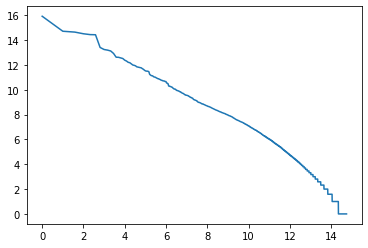

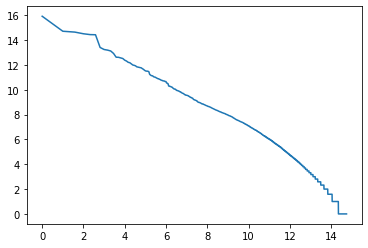

In [127]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

import matplotlib.pyplot as plt
import math

def plotFrequencyGraph(frequency):
  rank = 1
  chartList = []
  for t in frequency:
    chartList.append((math.log(rank,2), math.log(t[1],2)))
    rank = rank + 1
  x, y = zip(*chartList)
  plt.plot(x,y)
  plt.show()


plotFrequencyGraph(frequency)

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [128]:
# TODO: Data acquisition code here.

# I have taken first 3 chapters of the classic novel "Animal Farm" written by George Orwell.
# The collection contains only text and no media files since it is a literary work.
# To be able to perform text analysis, the data is cleaned by
# removing certain special characters such as "?", "!", ".", "-", etc.
# To maintain consistency, all the words are converted to lowercase.

!wget -O chapter1.md https://raw.githubusercontent.com/abiduzz420/docs-for-information-retrieval/main/chapter1.md
!wget -O chapter2.md https://raw.githubusercontent.com/abiduzz420/docs-for-information-retrieval/main/chapter2.md
!wget -O chapter3.md https://raw.githubusercontent.com/abiduzz420/docs-for-information-retrieval/main/chapter3.md

--2021-10-05 03:41:57--  https://raw.githubusercontent.com/abiduzz420/docs-for-information-retrieval/main/chapter1.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14348 (14K) [text/plain]
Saving to: ‘chapter1.md’

chapter1.md         100%[===================>]  14.01K  --.-KB/s    in 0s      

2021-10-05 03:41:57 (86.0 MB/s) - ‘chapter1.md’ saved [14348/14348]

--2021-10-05 03:41:57--  https://raw.githubusercontent.com/abiduzz420/docs-for-information-retrieval/main/chapter2.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [129]:
# TODO: Tokenization code here.

# Tokenization methodology:
# Retrieve all the chapters in md fileformat
# Opened each file in read mode
# Read the file
# Remove special characters, new lines and convert all words to lowercase
# Identify the words which fall into 'title' and 'body' fields
# Find the count of all the words in a particular document
# Create record which contains fields such as
# term - represents the word
# count - number of times repeated in a particular document
# id - to identify the document in which the word is present
# field - region where the word is found
# word belonging to the title gets field value - title and
# one belonging to the body gets field value - body


filenames = ["chapter1.md", "chapter2.md", "chapter3.md"]

def cleanDoc(doc):
  return doc.replace('\n', " ").replace('”', " ").replace('—', " ").replace('.', "").replace('"', " ").replace('?', " ").replace('!', "").lower()

def processFiles(files):
  chapters = dict()
  for f in files:
    file = open(f, "r")
    lines = file.read()
    lines = cleanDoc(lines)
    chapters[f] = lines.split()
  return chapters

chapterDict = processFiles(filenames)

def createRecord(fileId, word, field, count):
  return {'field': field, 'term': word, 'id': fileId, 'count': count}

def wordCountDict(wordList):
  wcdict = dict()
  for w in wordList:
    if w in wcdict.keys():
      wcdict[w] = wcdict[w] + 1
    else:
      wcdict[w] = 1
  return wcdict


def createTerms(files):
  terms = []
  for k,v in files.items():
    countDict = wordCountDict(v)
    terms.append({'term': v[0], 'field': 'title', 'count': countDict[v[0]], 'id': k})
    for word in set(v[1:]):
      terms.append(createRecord(k, word, 'body', countDict[word]))
  return terms

terms = createTerms(chapterDict)
terms


    



[{'count': 1, 'field': 'title', 'id': 'chapter1.md', 'term': 'chapter-1'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'mane,'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'mine'},
 {'count': 10, 'field': 'body', 'id': 'chapter1.md', 'term': 'when'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'god'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'reminded'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'laughed'},
 {'count': 6, 'field': 'body', 'id': 'chapter1.md', 'term': 'ever'},
 {'count': 2, 'field': 'body', 'id': 'chapter1.md', 'term': 'miserable'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'spread'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'catch'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'goat,'},
 {'count': 1, 'field': 'body', 'id': 'chapter1.md', 'term': 'towards'},
 {'count': 2, 'field': 'body', 'id': 'chapter1.md', 'term': 'natural'},
 {'co

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

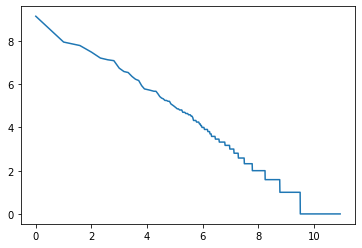

In [130]:
terms_dict = totalItemCount(terms)
sort_dict = sortValues(terms_dict)
frequency = list(sort_dict.items())
plotFrequencyGraph(frequency)

# Observations:
# 1. Number of distinct words are less in George Orwell's Animal Farm text collection because the log(rank) in 2nd graph range between [0,11]
# as opposed to [0,15] in the initial graph
# 2. Frequency of the most repeated word is higher in the newswire collection than in the 2nd one.